### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

['image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg', 'test_img.jpg']


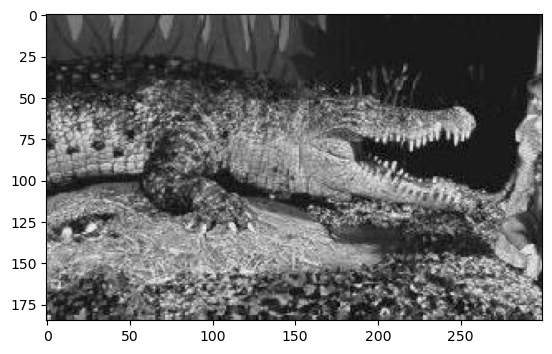

In [2]:
img_list = os.listdir("IN")
print(img_list)

image = []
for i in range(len(img_list)):
    image.append(cv2.imread("IN\\" + str(img_list[i]), cv2.IMREAD_GRAYSCALE))
              
img = image[1]
plt.imshow(img, cmap='gray')
plt.show();

1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

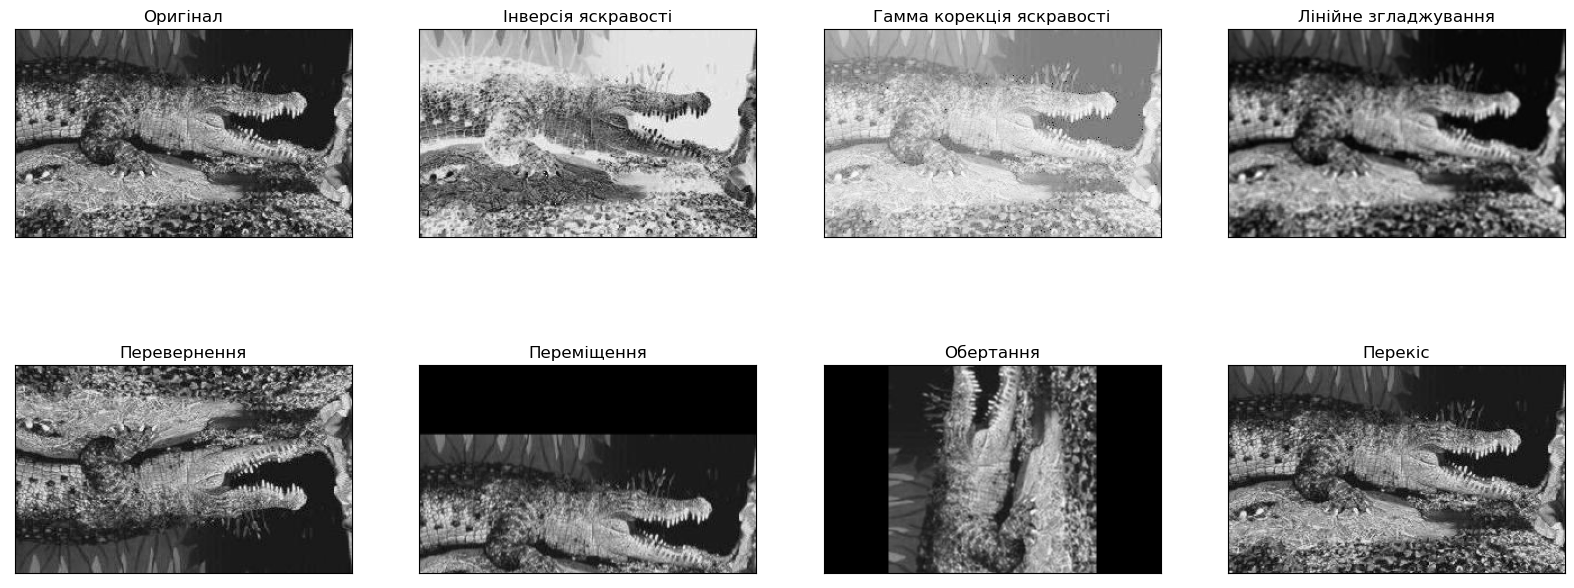

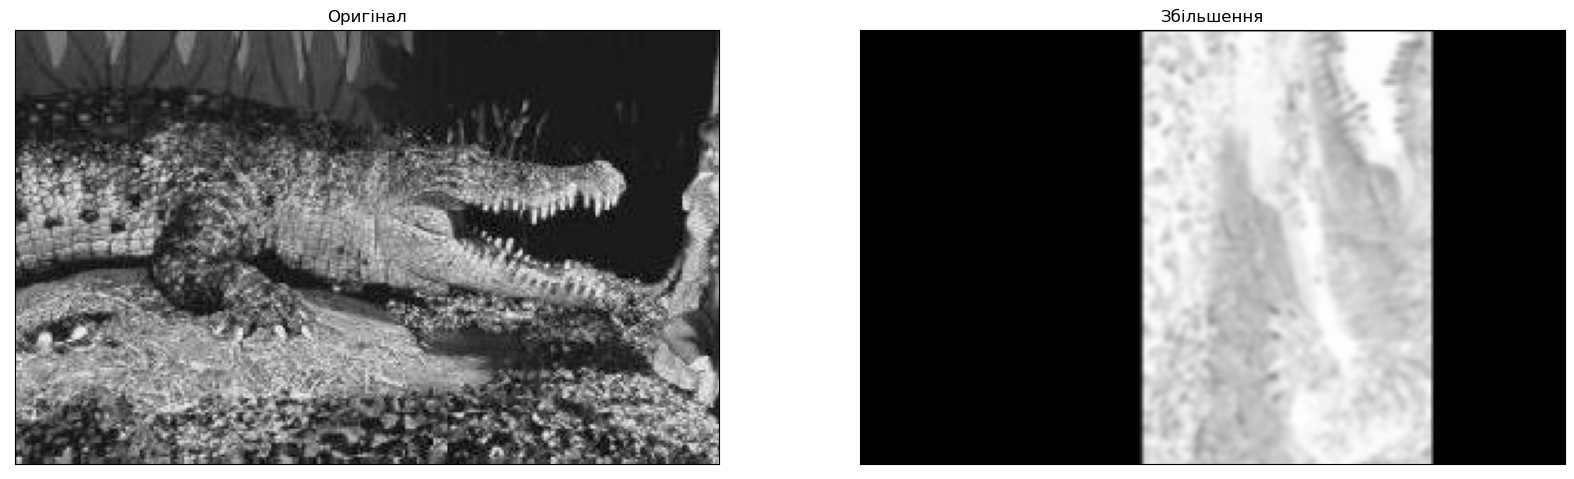

In [3]:
def brightness_inversion(img):#інверсія яскравості      
    return np.iinfo('uint8').max - 1 - img

def gamma_correction(img, gamma = 0.3, c = 1):#гамма корекція яскравості
    return (c * np.power(img, gamma) / np.max(c * np.power(img, gamma))*255).astype(np.uint8)

def linear_smoothing(img , n = 3):#лінійне згладжування n*n {3x3, 5x5, 9x9, 15x15...}
    return cv2.filter2D(img, -1, np.ones((n,n),np.float32) / (n * n))

def turning_over(img,flipCode = 0):#перевернути зображення {0:x; 1:y; -1:x,y}
    return cv2.flip(img, flipCode)

def moving(img, M = np.float32([[1, 0, 1], [0, 1, img.shape[0]/3]])):#переміщення moving - масив переміщення
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate(img, angle = 90):
    return cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1), (img.shape[1], img.shape[0]))

def skew(img, M = np.float32([[1,0,1], [0,1,1]])):
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def data_augmentation(img):
    return skew(rotate(moving(turning_over(linear_smoothing(gamma_correction(brightness_inversion(img)))))))

plt.figure(figsize=(20, 8))
plt.subplot(241),plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Оригінал")
plt.subplot(242),plt.imshow(brightness_inversion(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Інверсія яскравості")
plt.subplot(243),plt.imshow(gamma_correction(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Гамма корекція яскравості")
plt.subplot(244),plt.imshow(linear_smoothing(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Лінійне згладжування")
plt.subplot(245),plt.imshow(turning_over(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Перевернення")
plt.subplot(246),plt.imshow(moving(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Переміщення")
plt.subplot(247),plt.imshow(rotate(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Обертання")
plt.subplot(248),plt.imshow(skew(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Перекіс")

plt.figure(figsize=(20, 8))
plt.subplot(121),plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Оригінал")
plt.subplot(122),plt.imshow(data_augmentation(img), cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Збільшення")

plt.show();

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

In [4]:
j = 0
for i in image:
    cv2.imwrite("OUT\image_data_augmentation_" + str(j) + ".png",  data_augmentation(i))
    j+=1

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки

2.1. Відкрити та завантажити наступне зображення:
  .../test_img.jpg

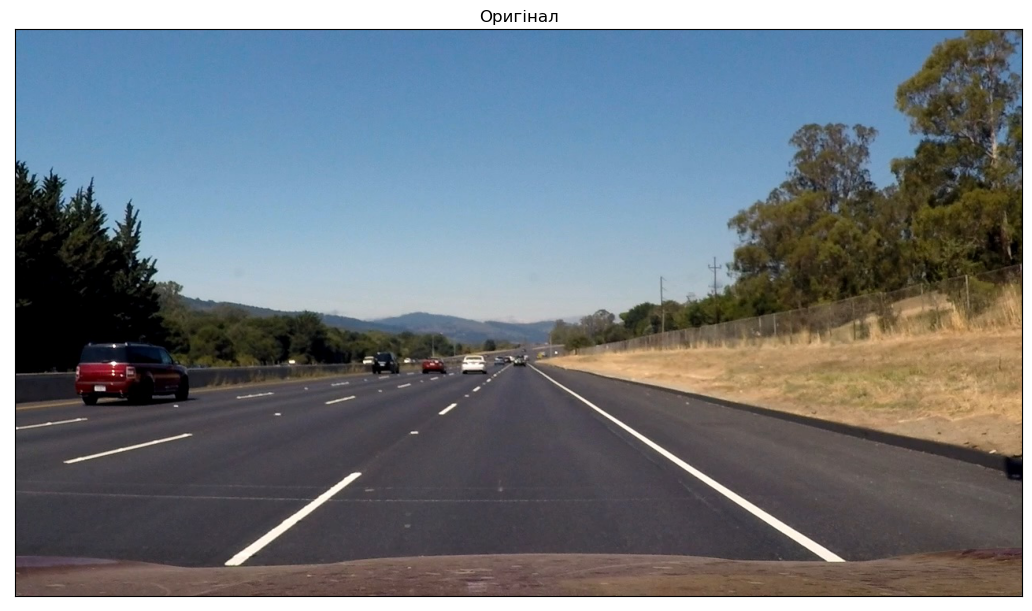

width :1280
height :720


In [5]:
img = cv2.cvtColor(cv2.imread("IN/test_img.jpg"), cv2.COLOR_BGR2RGB)

height = img.shape[0]
width = img.shape[1]

plt.figure(figsize=(13, 8))
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("Оригінал")
plt.show()

print("width :" + str(width) + "\nheight :" + str(height))

2.2 Задати розмір вихідного зображення:

In [6]:
OUT_IMG_WIDTH = 800
OUT_IMG_HEIGHT = 1200

2.3 Задати координати ROI вхідного зображення: 

2.4 Задати координати ROI вихідного зображення: 

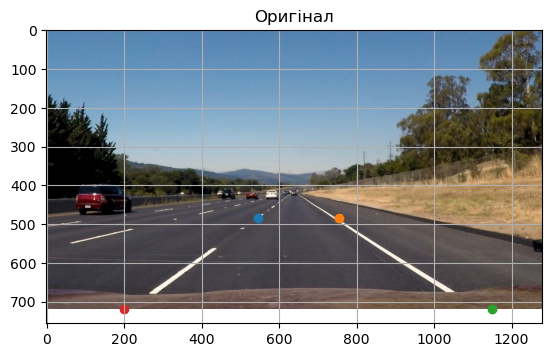

In [7]:
t1 = ([545, 485])
t2 = ([755, 485])
t3 = ([1150, 720])
t4 = ([200, 720])

src = np.float32([t1, t2, t3, t4])
dst = np.float32([[0, 0], [OUT_IMG_WIDTH, 0], [OUT_IMG_WIDTH, OUT_IMG_HEIGHT], [0, OUT_IMG_HEIGHT]])


plt.imshow(img), plt.title("Оригінал"), plt.grid()
plt.scatter(t1[0],t1[1])
plt.scatter(t2[0],t2[1])
plt.scatter(t3[0],t3[1])
plt.scatter(t4[0],t4[1])

plt.show()

2.5 Визначити матрицю перетворення перспективи

In [8]:
M = cv2.getPerspectiveTransform(src, dst)
print(M)

[[-6.07333226e-01 -8.91616863e-01  7.63430787e+02]
 [ 2.76802735e-15 -3.68276530e+00  1.78614117e+03]
 [ 1.98638327e-18 -2.39056695e-03  1.00000000e+00]]


2.6 Виконати перетворення перспективи

In [9]:
wraped_img = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH,OUT_IMG_HEIGHT))

2.7 Відобразити вихідне зображення

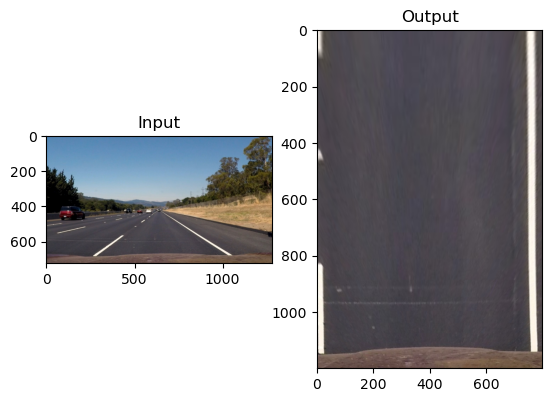

In [10]:
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(wraped_img),plt.title('Output')
plt.show()